# Python Practice 8

In [9]:
import numpy as np
import matplotlib.pyplot as plt

Open a `heights.csv` file with `np.loadtxt()` function. Be sure to set a correct 
delimiter in the `np.loadtxt()` function

In [11]:
heights = np.loadtxt('heights.csv', delimiter=',')

Let's plot the data distribution with `plt.hist()` function. Since we have a 2D array,
we might need to convert it to th 1D array first by calling the `flatten()` **method** of an array.

Generally speaking, method is usually a certain function that belongs to a class.
This function acts directly on the object it was called by (in our case - numpy array). 
You can think of the following analogy:

```python
def mean(array):
    return np.mean(array)
```
and
```python
array.mean()
```
are equivalent. The first one is a function that takes an array as an argument, while the second one is a method that belongs to the array class.

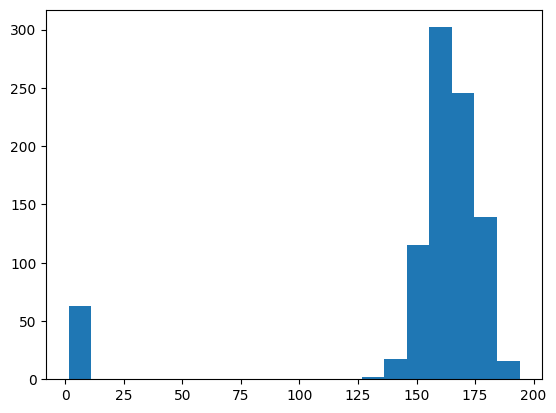

In [19]:
flattened_heights = heights.flatten()
plt.hist(flattened_heights, bins=20)
plt.show()

We clearly see that something is wrong with the data. Let's try to find out
the reason for that.

First we might need to take a look, what are the exact values of those weird
heights. To do that, we need to select all the heights that are less than
10 (for instance) by using the `heights[heights < 10]` syntax.

In [ ]:
heights[heights < 3.0]

array([1.74, 1.61, 1.64, 1.55, 1.56, 1.68, 1.62, 1.76, 1.69, 1.7 , 1.63,
       1.44, 1.5 , 1.62, 1.49, 1.73, 1.73, 1.52, 1.54, 1.61, 1.47, 1.69,
       1.79, 1.6 , 1.79, 1.62, 1.67, 1.61, 1.62, 1.69, 1.66, 1.77, 1.63,
       1.61, 1.6 , 1.76, 1.7 , 1.7 , 1.62, 1.81, 1.67, 1.61, 1.55, 1.5 ,
       1.59, 1.65, 1.73, 1.49, 1.69, 1.66, 1.75, 1.62, 1.74, 1.64, 1.66,
       1.7 , 1.71, 1.66, 1.67, 1.67, 1.67, 1.54, 1.58])

It turns out that the values are just listed in meters, not in centimeters. 
To fix this issue, let's create the function that checks if the height is less than 3 meters
and if it is, it multiplies the height by 100 to convert it to centimeters.

In [22]:
def fix_height_units(original_heights, threshold = 3.0):
    fixed_heights = original_heights.copy() # We don't want to modify the original array, so we make a copy
    for i in range(len(fixed_heights)):
        for j in range(len(fixed_heights[i])):
            if fixed_heights[i][j] < threshold:
                fixed_heights[i][j] = fixed_heights[i][j] * 100.0
    return fixed_heights

We can also use the advanced numpy indexing to select all the heights that are less than 3 meters
and multiply them by 100. In this example we can use the `heights[heights < 3] = heights[heights < 3] * 100` syntax.
What happens is that `heights < 3` returns a boolean array of the same shape as the original array.
Each element of this array is eigher `True` or `False` depending on whether the condition is met.
Then we use this boolean array to select only the elements that are less than 3 meters and multiply them by 100.

In [23]:
def fix_height_units_vectorized(original_heights, threshold = 3.0):
    fixed_heights = original_heights.copy() # We don't want to modify the original array, so we make a copy
    fixed_heights[fixed_heights < threshold] = fixed_heights[fixed_heights < threshold] * 100
    return fixed_heights

In [24]:
fixed_heights = fix_height_units(heights, threshold = 3.0) # This is our original function
fixed_heights_vectorized = fix_height_units_vectorized(heights, threshold=3.0) # This is our vectorized function

In [ ]:
np.allclose(fixed_heights, fixed_heights_vectorized) # This will fail if the two arrays are not equal

True

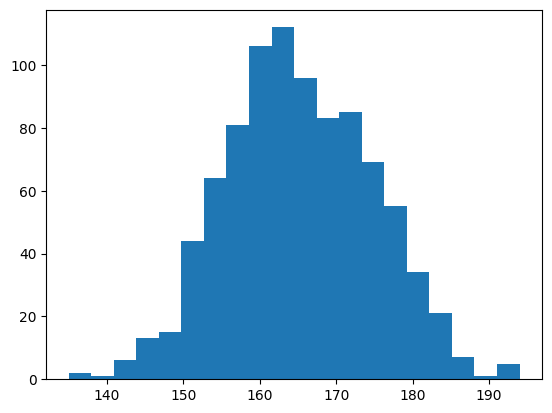

In [26]:
plt.hist(fixed_heights.flatten(), bins=20)
plt.show()

Now let's test the following hypothesis: 

"Is the true mean that represents the sample a given sample different from the population mean? Assume that the standard deviation of the data $\sigma = 10$. Use a 95% confidence interval."

To do that, we need to calculate first the population mean by using the `np.mean()` function over all the heights.
Then we need to calculate the samples means by using the `np.mean()` function over each sample, or by providing
the `axis=1` argument to the `np.mean()` function. 

Given that we know the standard deviation, the number of samples and the confidence level, we can use the formula
for the z-score:

$$z_{\bar{x}} = \frac{\bar{x} - \mu}{\frac{\sigma}{\sqrt{n}}}$$

where $\bar{x}$ is the sample mean, $\mu$ is the population mean, $\sigma$ is the standard deviation and $n$ is the number of samples.

In [ ]:
population_mean = np.mean(fixed_heights)
samples_mean = np.mean(fixed_heights, axis=1)
n = len(fixed_heights[0])
stddev = 10.0

z_score = (samples_mean - population_mean) / (stddev / np.sqrt(n))

In [41]:
z_threshold = 1.96
test_results = np.abs(z_score) > z_threshold

In [43]:
sum(test_results == True)

5

In [44]:
num_samples = len(test_results)
num_outliers = sum(test_results == True)

print("Total number of samples: ", num_samples)
print("Number of outliers: ", num_outliers)

Total number of samples:  100
Number of outliers:  5
